## Saturation analysis
IsoTools provides two approaches to assess the required depth of sequencing:
* Saturation analysis: 
    * Models the propability of observing a transcript with at least n reads. 
    * Depends on the expression level on the transcript
    * E.g.: "With the given seq depth, the probability of observing a 1 TPM transcript is > 80%"
* Rarefaction analysis
    * Subsamples the reads and counts the number of observed transcripts.
    * Helps estimating, how much more transcripts would be observed with deeper sequencing.
    * If the curve is relativly flat towards the right, deeper sequencing would yield little additional transcripts.
    * Can be restricted to a subset of transcripts (e.g. only matching reference annotation or only novel genes)
    
The following steps assume you have downloaded the prepared transcriptome pkl file PacBio_isotools_substantial_isotools.pkl from the [demonstration dataset](https://oc-molgen.gnz.mpg.de/owncloud/s/gjG9EPiQwpRAyg3).

In [1]:
from isotools import Transcriptome

path='demonstration_dataset'
isoseq=Transcriptome.load(f'{path}/PacBio_isotools_substantial_isotools.pkl')

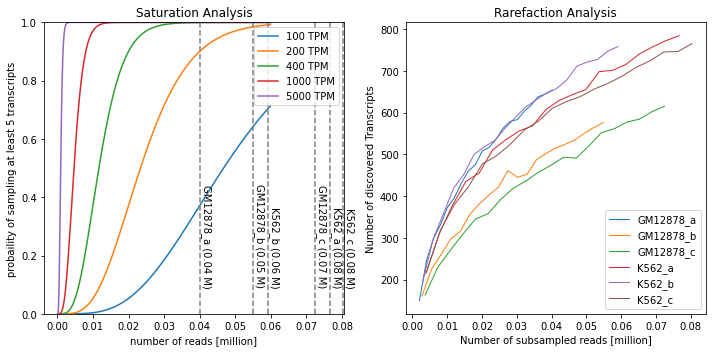

In [2]:
from isotools.plots import plot_saturation, plot_rarefaction
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (10,5)
fig, axs=plt.subplots(1,2)

plot_saturation(isoseq,cov_th=5, expr_th=[100, 200, 400, 1000, 5000],x_range=(1e2,6e4,1e2), ax=axs[0])

rarefraction, total=isoseq.rarefaction(min_coverage=2, tr_filter={'query':'FSM'})
plot_rarefaction(rarefraction, total=total, ax=axs[1])

fig.tight_layout()

